In [178]:
from tkinter import *
from tkinter import messagebox
import tkinter as tk
from tkinter import ttk
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from tkinter import Button, Entry, Label, LabelFrame, messagebox
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Phân tích dữ liệu

In [179]:
# Đọc dữ liệu gán vào df bằng thư viện pandas
df = pd.read_csv(r'/kaggle/input/weatherdata/Weather_Data_Kaggle.csv')

In [180]:
#Thực hiện kiểm tra cấu trúc của file
def check(df):
  l=[]
  columns=df.columns
  for col in columns:
    dtypes=df[col].dtypes
    nunique=df[col].nunique()
    sum_null=df[col].isnull().sum()
    l.append([col,dtypes,nunique,sum_null])
  df_check=pd.DataFrame(l)
  df_check.columns=['column','dtypes','nunique','sum_null']
  return df_check
check(df)


,column,dtypes,nunique,sum_null
0,Date,object,3271,0
1,Temp9am,float64,229,3
2,Temp3pm,float64,240,4
3,MinTemp,float64,204,4
4,MaxTemp,float64,247,11
5,Rainfall,float64,208,13
6,RainToday,object,2,10
7,Evaporation,float64,82,7
8,Sunshine,float64,137,9
9,WindGustDir,object,16,13


Khi phân tích thuộc tính ta nhận thấy thuộc tính Date (ngày) là thuộc tính không là ảnh hướng đến mô mình. Nên ta sẽ xoá thuộc tính Date khỏi dữ liệu

In [181]:
# Xóa cột Date vì nó không làm ảnh hưởng gì đến mô hình
df.drop('Date', axis = 1, inplace = True)

In [182]:
# lấy ra các cột dữ liệu datatype  =  object
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
# lấy ra các cột dữ liệu datatype != object
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [183]:
# Thống kê thông tin
import pandas as pd
# Đọc dữ liệu
df = pd.read_csv('/kaggle/input/weatherdata/Weather_Data_Kaggle.csv')
# Thống kê thông tin
statistics = df.describe()
print(statistics)


           Temp9am      Temp3pm      MinTemp      MaxTemp     Rainfall  \
count  3268.000000  3267.000000  3267.000000  3260.000000  3258.000000   
mean     17.819737    21.543710    14.871503    23.000767     3.353775   
std       4.894173     4.298543     4.554641     4.483649     9.935684   
min       6.400000    10.200000     4.300000    11.700000     0.000000   
25%      13.800000    18.400000    11.000000    19.600000     0.000000   
50%      18.200000    21.300000    14.900000    22.800000     0.000000   
75%      21.700000    24.500000    18.750000    26.000000     1.400000   
max      36.500000    44.700000    27.600000    45.800000   119.400000   

       Evaporation     Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  3264.000000  3262.000000    3268.000000   3268.000000   3268.000000   
mean      5.171569     7.166861      41.476744     15.078947     19.302326   
std       2.752854     3.816059      10.811902      7.045561      7.451328   
min       0.000000   

Dựa trên phân tích trên, ta xử lý ngoại lai cho các cột sau: Rainfall, Evaporation, Sunshine, WindGustSpeed

#2. Biểu đồ trực quan hóa dữ liệu

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


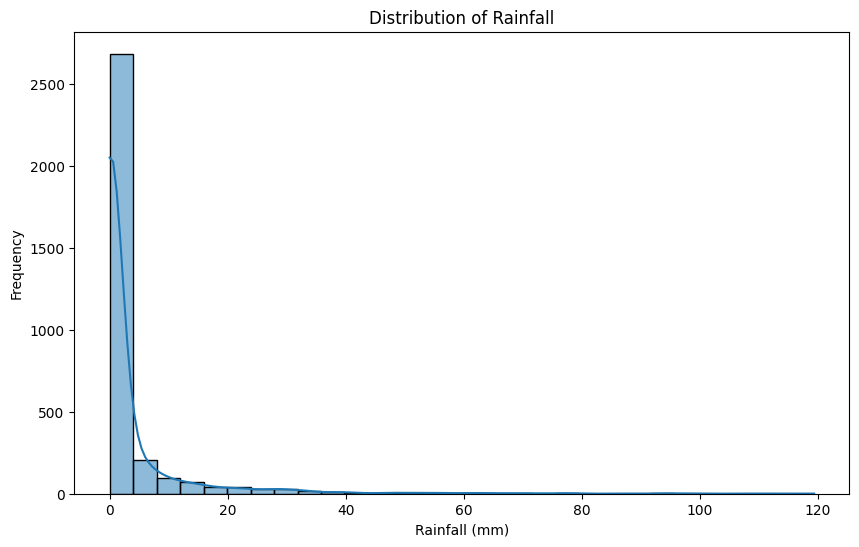

In [184]:
# Biểu đồ phân phối Lượng mưa trong một ngày cụ thể
plt.figure(figsize=(10, 6))
sns.histplot(df['Rainfall'], bins=30, kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

Biểu đồ cho thấy rằng phần lớn các giá trị lượng mưa đều tập trung gần 0. Có rất ít giá trị lớn hơn 20, và các giá trị này giảm nhanh chóng khi lượng mưa tăng lên. Điều này cho thấy một phân bố không đều với sự tập trung cao tại các giá trị thấp.

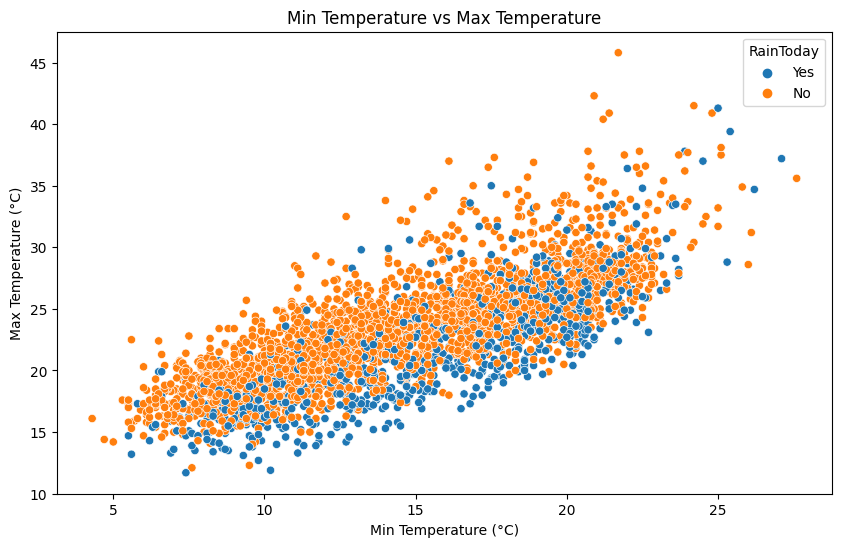

In [185]:
#trực quan hóa mối quan hệ giữa nhiệt độ tối thiểu và tối đa, đồng thời cho phép bạn thấy mối liên hệ này theo từng nhóm dựa trên biến RainToday
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MinTemp', y='MaxTemp', hue='RainToday', data=df)
plt.title('Min Temperature vs Max Temperature')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Max Temperature (°C)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


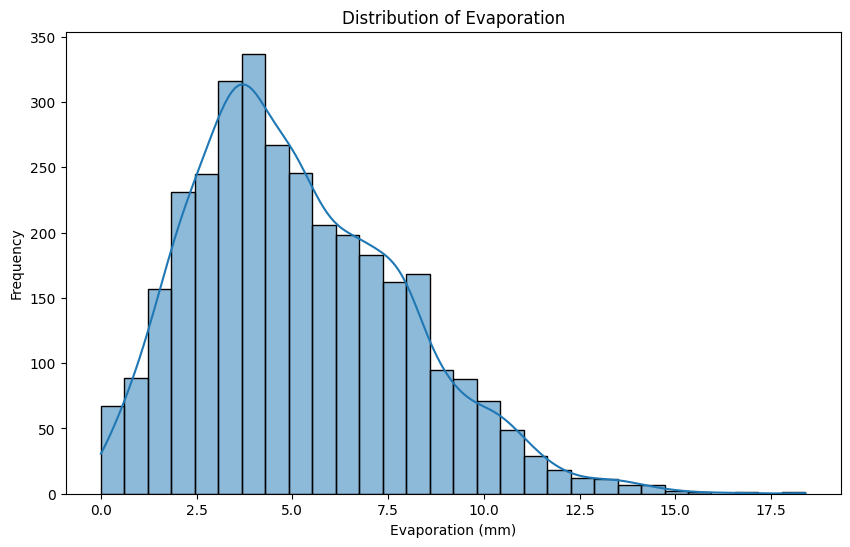

In [186]:
# Biểu đồ phân phối Bốc hơi trong một ngày cụ thể.
plt.figure(figsize=(10, 6))
sns.histplot(df['Evaporation'], bins=30, kde=True)
plt.title('Distribution of Evaporation')
plt.xlabel('Evaporation (mm)')
plt.ylabel('Frequency')
plt.show()

Biểu đồ cho thấy phân bố của lượng bay hơi có dạng lệch phải, với phần lớn giá trị tập trung ở mức thấp và trung bình. Có một số giá trị bay hơi cao hơn (trên 10) nhưng chúng xuất hiện ít, điều này thể hiện rõ qua các cột histogram nhỏ dần khi lượng bay hơi tăng lên.
Đỉnh của phân bố nằm khoảng từ 2.5 đến 5.0, với số lượng mẫu cao nhất xuất hiện ở khoảng này.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


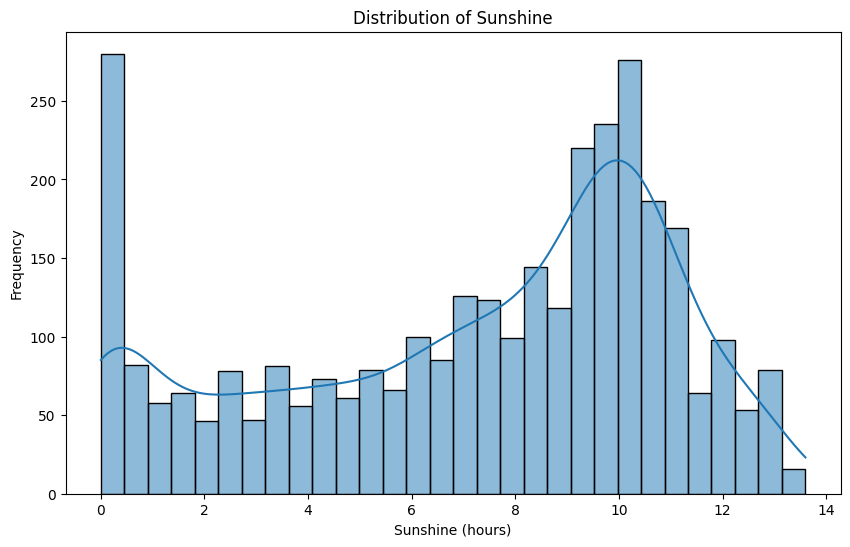

In [187]:
#Biểu đồ phân phối Ánh nắng rực rỡ trong một ngày cụ thể
plt.figure(figsize=(10, 6))
sns.histplot(df['Sunshine'], bins=30, kde=True)
plt.title('Distribution of Sunshine')
plt.xlabel('Sunshine (hours)')
plt.ylabel('Frequency')
plt.show()

Biểu đồ histogram cho thấy phân bố của số giờ nắng có hai đỉnh, với một đỉnh lớn ở giá trị gần bằng 0 và một đỉnh khác ở khoảng 10 giờ.
Số lượng mẫu lớn nhất xuất hiện tại hai giá trị này, cho thấy rằng có nhiều ngày không có nắng và nhiều ngày có số giờ nắng cao.
Các giá trị ở khoảng giữa (từ 4 đến 8 giờ) có tần suất thấp hơn so với hai đỉnh chính, nhưng vẫn có sự xuất hiện đáng kể.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


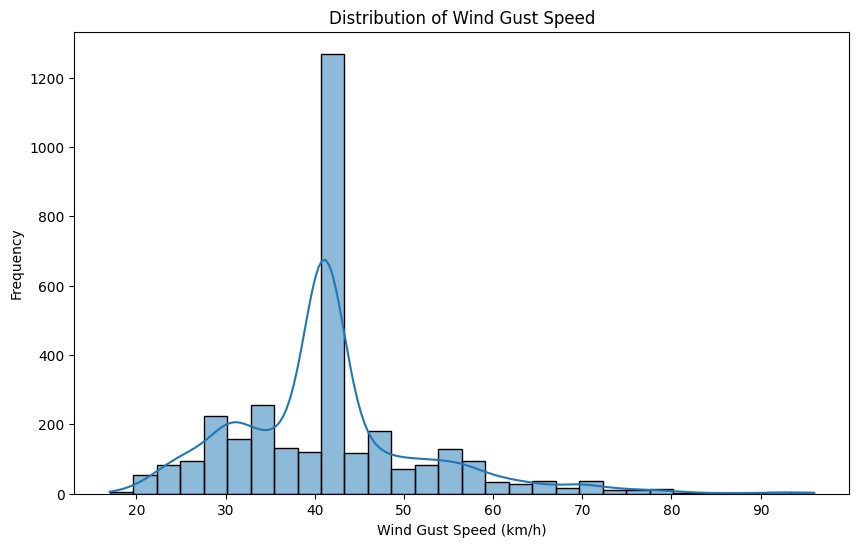

In [188]:
#Biểu đồ phân phối Tốc độ gió mạnh nhất trong ngày
plt.figure(figsize=(10, 6))
sns.histplot(df['WindGustSpeed'], bins=30, kde=True)
plt.title('Distribution of Wind Gust Speed')
plt.xlabel('Wind Gust Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

Biểu đồ cho thấy phân bố Tốc độ gió mạnh nhất trong ngày có dạng lệch phải, với phần lớn giá trị tập trung ở mức thấp và trung bình.

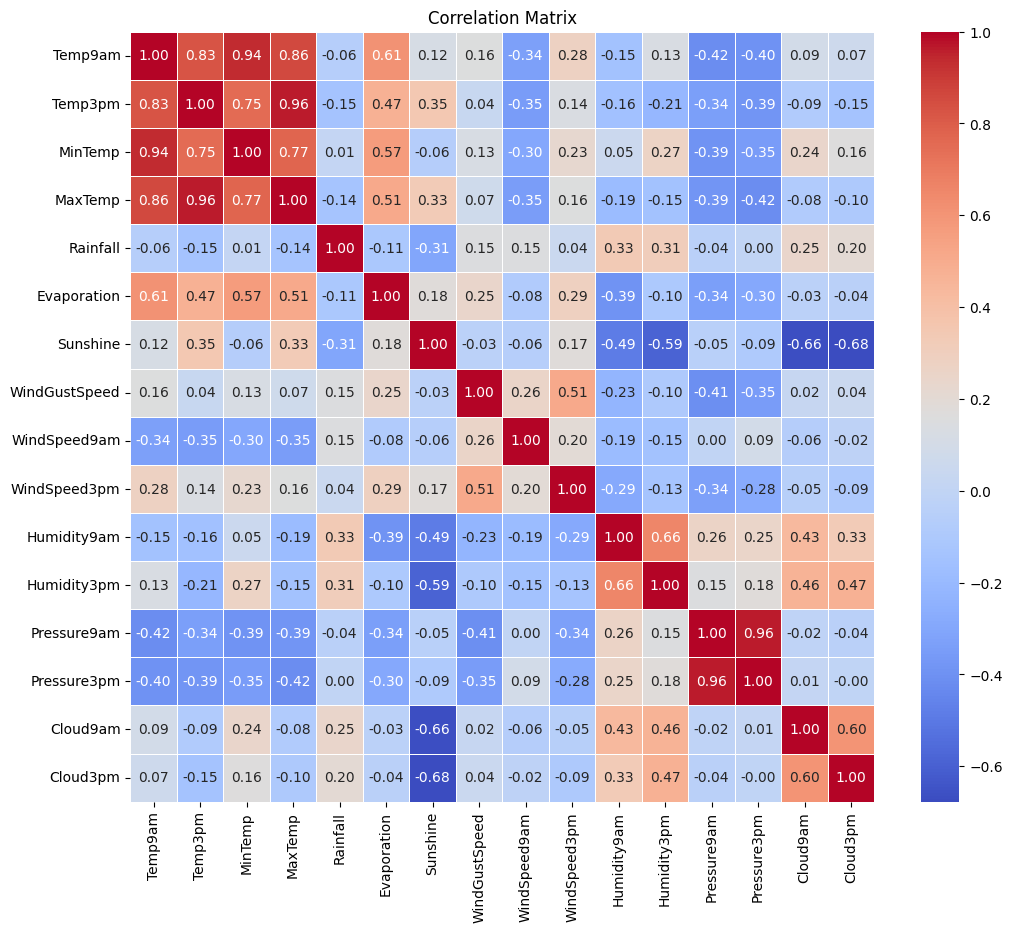

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ các cột không phải là số
numeric_df = df.select_dtypes(include=[np.number])

# Tính toán ma trận tương quan
correlation_matrix = numeric_df.corr()

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#2. Xử lý các dữ liệu ngoại lệ

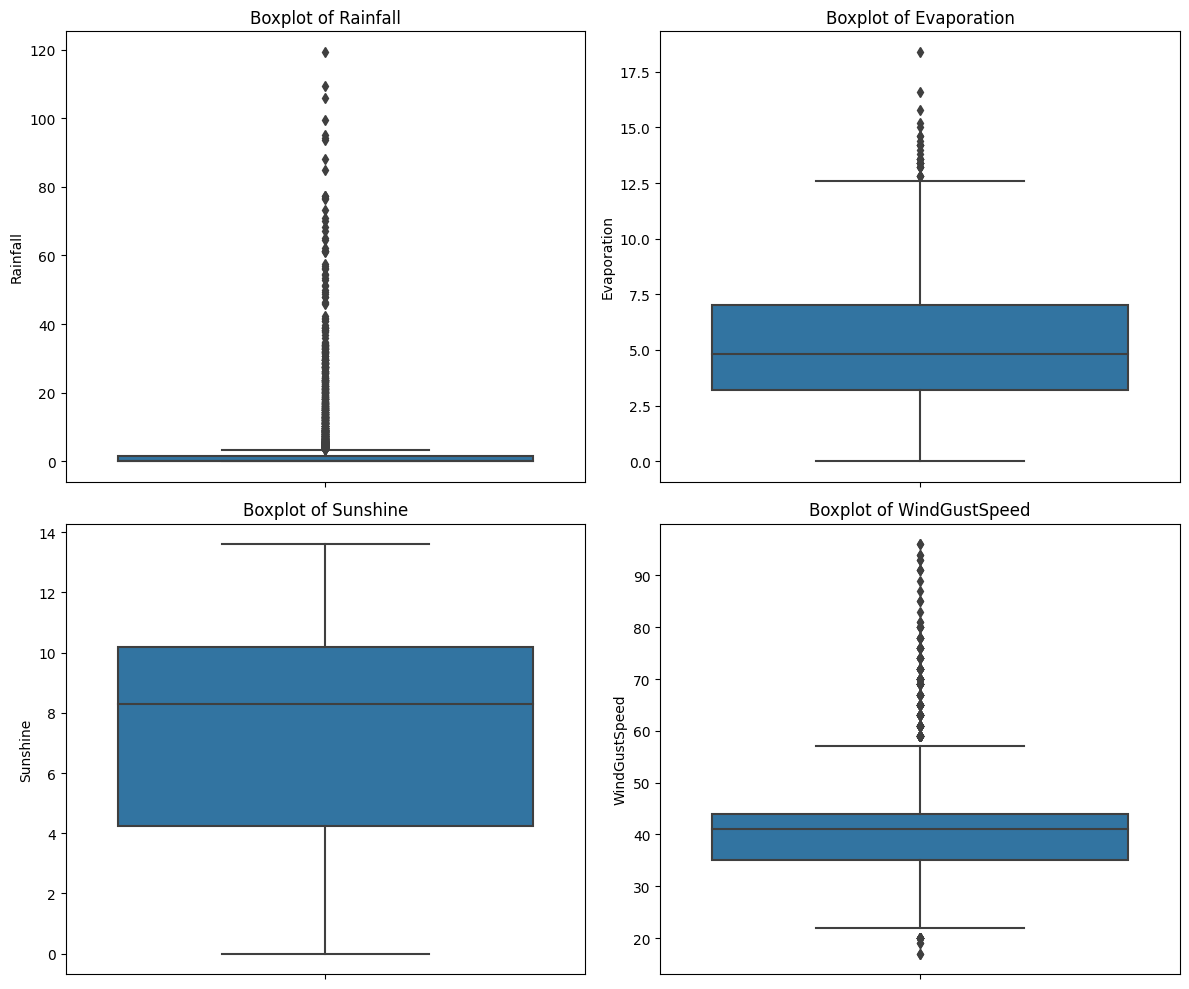

In [190]:
# Biểu đồ trước khi xử lý giá trị ngoại lệ
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ các biểu đồ boxplot
plt.figure(figsize=(12, 10))

# Boxplot for Rainfall
plt.subplot(2, 2, 1)
sns.boxplot(y='Rainfall', data=df)
plt.title('Boxplot of Rainfall')

# Boxplot for Evaporation
plt.subplot(2, 2, 2)
sns.boxplot(y='Evaporation', data=df)
plt.title('Boxplot of Evaporation')

# Boxplot for Sunshine
plt.subplot(2, 2, 3)
sns.boxplot(y='Sunshine', data=df)
plt.title('Boxplot of Sunshine')

# Boxplot for WindGustSpeed
plt.subplot(2, 2, 4)
sns.boxplot(y='WindGustSpeed', data=df)
plt.title('Boxplot of WindGustSpeed')

plt.tight_layout()
plt.show()


Nhìn vào biểu đồ ta thấy các giá trị của các thuộc tính đang phân bố không đều.
Ta thực hiện xử lý các giá trị ngoại lai bằng phương pháp IQR


In [191]:
# lấy ra các cột dữ liệu datatype  =  object
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
# lấy ra các cột dữ liệu datatype != object
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [192]:
# In ra số nhãn của các cột datatype = object
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")
columns_of_interest  = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed']

Date has 3271 categories

RainToday has 2 categories

WindGustDir has 16 categories

WindDir9am has 16 categories

WindDir3pm has 16 categories



In [193]:
# Hàm Xử lý giá trị ngoại lai theo pp IQR
def remove_outliers_iqr(df, column):
    # Q1 là giá trị phân vị thứ 25% (quý 1), có nghĩa là 25% giá trị của cột nằm dưới giá trị này.
    Q1 = df[column].quantile(0.25)
    # Q3 là giá trị phân vị thứ 75% (quý 3), có nghĩa là 75% giá trị của cột nằm dưới giá trị này.
    Q3 = df[column].quantile(0.75)
    # IQR là khoảng tứ phân vị, là khoảng cách giữa Q3 và Q1, đại diện cho phạm vi giữa 50% dữ liệu trung bình.
    IQR = Q3 - Q1
    # lower_bound là giới hạn dưới để xác định ngoại lệ, được tính bằng cách lấy Q1 trừ đi 1.5 lần IQR.
    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [194]:
# Xử lý ngoại lai cho các cột số liệu
for col in columns_of_interest:
    df = remove_outliers_iqr(df, col)

print("Dữ liệu sau khi xử lý ngoại lai:")
print(df.describe())

Dữ liệu sau khi xử lý ngoại lai:
           Temp9am      Temp3pm      MinTemp      MaxTemp     Rainfall  \
count  2320.000000  2317.000000  2320.000000  2314.000000  2320.000000   
mean     17.748276    21.781139    14.667414    23.167934     0.267155   
std       4.969619     4.110494     4.663964     4.279922     0.667297   
min       6.400000    10.500000     4.300000    11.700000     0.000000   
25%      13.600000    18.700000    10.700000    19.900000     0.000000   
50%      18.200000    21.600000    14.500000    23.100000     0.000000   
75%      21.900000    24.800000    18.800000    26.100000     0.200000   
max      31.500000    40.700000    26.200000    40.900000     3.400000   

       Evaporation     Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  2320.000000  2320.000000    2320.000000   2319.000000   2319.000000   
mean      5.211121     7.815043      38.727586     14.260026     18.457094   
std       2.555588     3.548538       6.837731      6.535633      

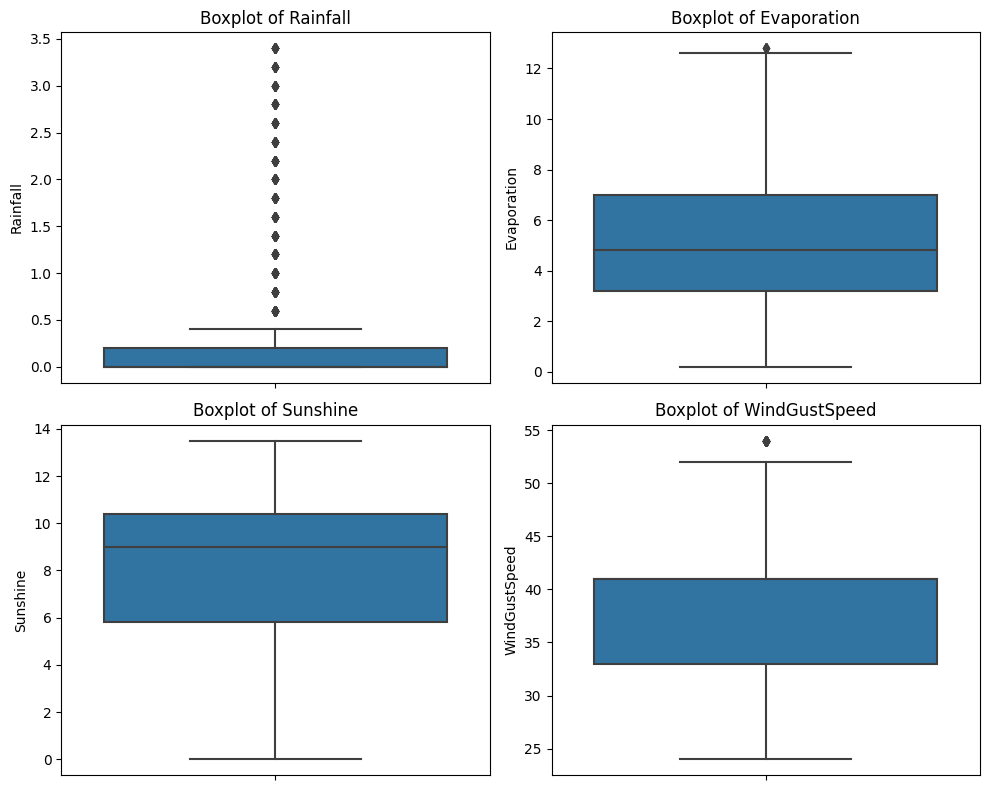

In [195]:
# Vẽ biểu đồ phân phối của các thuộc tính đã xử lý ngoại lai
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['Rainfall'])
plt.title('Boxplot of Rainfall')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Evaporation'])
plt.title('Boxplot of Evaporation')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Sunshine'])
plt.title('Boxplot of Sunshine')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['WindGustSpeed'])
plt.title('Boxplot of WindGustSpeed')

plt.tight_layout()
plt.show()

### Nhìn vào các biểu đồ boxplot sau khi xử lý ngoại lai, chúng ta có thể rút ra một số nhận xét sau:

- Rainfall: Biểu đồ boxplot của Rainfall vẫn có một vài điểm ngoại lai (outliers) ở giá trị cao. Điều này cho thấy dù đã xử lý ngoại lai bằng phương pháp IQR, vẫn còn một số giá trị mưa rất cao so với phần lớn các giá trị còn lại. Phần lớn giá trị Rainfall nằm rất thấp, gần như bằng 0.

- Evaporation: Biểu đồ boxplot của Evaporation sau khi xử lý ngoại lai không còn điểm ngoại lai nào nữa. Phân phối của giá trị Evaporation trở nên cân đối hơn, với khoảng tứ phân vị (IQR) nằm giữa khoảng 4 và 8. Giá trị trung bình (median) là khoảng 6.

- Sunshine: Biểu đồ boxplot của Sunshine sau khi xử lý ngoại lai vẫn có một số điểm ngoại lai ở giá trị thấp. Phần lớn giá trị Sunshine nằm trong khoảng từ 4 đến 10, với giá trị trung bình (median) khoảng 8. Một vài giá trị ngoại lai ở phía dưới cho thấy có một số ngày có ít ánh nắng hơn đáng kể.
- WindGustSpeed: Biểu đồ boxplot của WindGustSpeed sau khi xử lý ngoại lai không còn điểm ngoại lai nào nữa. Phân phối của giá trị WindGustSpeed trở nên cân đối hơn, với khoảng tứ phân vị (IQR) nằm giữa khoảng 30 và 45. Giá trị trung bình (median) là khoảng 40.

### Tổng kết
Phương pháp xử lý ngoại lai IQR đã hiệu quả trong việc loại bỏ các giá trị ngoại lai ở các cột Evaporation và WindGustSpeed.
Tuy nhiên, với cột Rainfall và Sunshine, vẫn còn một số giá trị ngoại lai còn lại, điều này có thể do sự phân phối không đồng đều của dữ liệu ban đầu.
Việc loại bỏ các giá trị ngoại lai giúp cho dữ liệu trở nên "sạch" hơn, tăng khả năng dự đoán của mô hình. Tuy nhiên, cần xem xét cẩn thận các giá trị ngoại lai còn lại, đặc biệt là với Rainfall và Sunshine, để đảm bảo rằng việc xử lý ngoại lai không làm mất mát thông tin quan trọng của dữ liệu.

#3. Tiền xử lý Dữ liệu


In [196]:
# Kiểm tra và sắp xếp các giá trị bị thiếu
df.isna().sum().sort_values(ascending = False)
# In ra dữ liệu ban đầu
print("Thông tin dữ liệu:")
print(df.info())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
Index: 2320 entries, 5 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2320 non-null   object 
 1   Temp9am        2320 non-null   float64
 2   Temp3pm        2317 non-null   float64
 3   MinTemp        2320 non-null   float64
 4   MaxTemp        2314 non-null   float64
 5   Rainfall       2320 non-null   float64
 6   RainToday      2319 non-null   object 
 7   Evaporation    2320 non-null   float64
 8   Sunshine       2320 non-null   float64
 9   WindGustDir    2313 non-null   object 
 10  WindGustSpeed  2320 non-null   float64
 11  WindDir9am     2318 non-null   object 
 12  WindDir3pm     2319 non-null   object 
 13  WindSpeed9am   2319 non-null   float64
 14  WindSpeed3pm   2319 non-null   float64
 15  Humidity9am    2319 non-null   float64
 16  Humidity3pm    2317 non-null   float64
 17  Pressure9am    2319 non-null   float64

In [197]:
# hàm điền các giá trị null, chúng ta sẽ sử dụng hai phương pháp:
# hàm lấy mẫu ngẫu nhiên cho các giá trị null
def random_value_imputation(feature):
    # Chọn mẫu ngẫu nhiên của cột df[feature]
    # dropna(): để loại bỏ các giá trị bị thiếu
    # sample(df[feature].isna().sum()): chọn ngẫu nhiên một số lượng bằng số lượng giá trị NaN trong cột
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    # Đánh chỉ số cho các giá vị trí bị thiếu trong cột
    random_sample.index = df[df[feature].isnull()].index
    # Gán các giá trị vào các ô bị thiếu
    df.loc[df[feature].isnull(), feature] = random_sample

In [198]:
# hàm điền giá trị bị thiếu theo pp mode (mode: tần số giá trị xuất hiện nhiều nhất)
def impute_mode(feature):
    # Tìm giá trị xuất hiện nhiều nhất trong cột
    mode = df[feature].mode()[0]
    # Điền giá trị bị thiếu bằng mode
    df[feature] = df[feature].fillna(mode)


In [199]:
# gọi hàm Điền các giá trị null bằng phương pháp ngẫu nhiên random_value_imputation
for col in num_cols:
    random_value_imputation(col)

# gọi hàm điền các giá trị còn thiếu của các cột datatype = object bằng pp mode
for col in cat_cols:
    impute_mode(col)

print("dữ liệu sau khi fill đủ thông tin:")
print(df.info())
print(df.describe())


dữ liệu sau khi fill đủ thông tin:
<class 'pandas.core.frame.DataFrame'>
Index: 2320 entries, 5 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2320 non-null   object 
 1   Temp9am        2320 non-null   float64
 2   Temp3pm        2320 non-null   float64
 3   MinTemp        2320 non-null   float64
 4   MaxTemp        2320 non-null   float64
 5   Rainfall       2320 non-null   float64
 6   RainToday      2320 non-null   object 
 7   Evaporation    2320 non-null   float64
 8   Sunshine       2320 non-null   float64
 9   WindGustDir    2320 non-null   object 
 10  WindGustSpeed  2320 non-null   float64
 11  WindDir9am     2320 non-null   object 
 12  WindDir3pm     2320 non-null   object 
 13  WindSpeed9am   2320 non-null   float64
 14  WindSpeed3pm   2320 non-null   float64
 15  Humidity9am    2320 non-null   float64
 16  Humidity3pm    2320 non-null   float64
 17  Pressure9am    2320 no

#3. Mã hóa dữ liệu


In [200]:
missing_values_after_outlier_removal = df.isna().sum().sort_values(ascending=False)
print("Kiểm tra số lượng giá trị từng thuộc tính:")
print(missing_values_after_outlier_removal)

Kiểm tra số lượng giá trị từng thuộc tính:
Date             0
WindDir9am       0
Cloud9am         0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed3pm     0
WindSpeed9am     0
WindDir3pm       0
WindGustSpeed    0
Temp9am          0
WindGustDir      0
Sunshine         0
Evaporation      0
RainToday        0
Rainfall         0
MaxTemp          0
MinTemp          0
Temp3pm          0
Cloud3pm         0
dtype: int64


In [201]:
# Khai báo hàm mã hoá
le = LabelEncoder()
# Thực hiện mã hoá
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
# in ra dữ liệu đã mã hóa
print("Dữ liệu đã mã hoá")
print(df.head())

Dữ liệu đã mã hoá
    Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall  RainToday  \
5   2025     23.8     26.0     20.2     27.2       1.6          1   
10   170     18.9     23.7     16.4     23.9       0.0          0   
11   248     22.9     24.7     18.9     27.3       0.0          1   
13   396     18.4     23.3     16.9     24.3       3.0          0   
14   471     19.5     23.8     18.3     24.4       0.0          0   

    Evaporation  Sunshine  WindGustDir  ...  WindDir9am  WindDir3pm  \
5           2.6       8.6           13  ...          13           1   
10          6.4       8.0           13  ...          14           0   
11          6.8       6.7           13  ...           3           4   
13          3.2       8.7           13  ...          11          10   
14          6.2       8.5           13  ...          12          10   

    WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
5            9.0          22.0         69.0         62.0       1002

# 4. Xây dựng mô hình

In [202]:
# Xoá cột  RainToday và gán các cột, hàng vào X
X =  df.drop(columns=['RainToday']).to_numpy()
# lấy tất cả thôngt in cột RainToday gán vào Y
y = np.array(df['RainToday'])

In [203]:
# Tạo các tập X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , shuffle = False)

In [204]:
# Function to run PCA and track accuracy and loss
# def PCA_method(formula, X, y):
#     max_accuracy = 0
#     accuracies = []
#     losses = []
#     num_components_list = []

#     for j in range(1, 20):
#         print("Lần lặp ", j)
#         pca = PCA(n_components=j)
#         Xbar = pca.fit_transform(X)
#         X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.3, shuffle=True)

#         if formula == 'id3':
#             model = DecisionTreeClassifier(criterion='entropy', random_state=0)
#         elif formula == 'cart':
#             model = DecisionTreeClassifier(criterion="gini")
#         elif formula == 'svm':
#             model = svm.SVC(kernel='linear', probability=True)

#         model.fit(X_train, y_train)
#         y_predict = model.predict(X_test)
#         accuracy = accuracy_score(y_test, y_predict)
#         accuracies.append(accuracy)

#         # Calculate loss (cross-entropy)
#         if formula == 'svm':
#             y_prob = model.predict_proba(X_test)
#             loss = -np.mean([np.log(y_prob[i, label]) for i, label in enumerate(y_test)])
#         else:
#             y_prob = model.predict_proba(X_test)
#             loss = -np.mean(np.log(y_prob[range(len(y_test)), y_test]))

#         losses.append(loss)
#         num_components_list.append(j)

#         print(f"Ty le du doan dung {formula}: ", accuracy)
#         print(f"Loss {formula}: ", loss)

#         if accuracy > max_accuracy:
#             max_accuracy = accuracy
#             num_pca = j
#             pca_best = pca
#             modeImax = model

#     # Plotting accuracy and loss
#     plt.figure(figsize=(14, 6))
#     plt.subplot(1, 2, 1)
#     plt.plot(num_components_list, accuracies, label='Accuracy')
#     plt.xlabel('Number of PCA Components')
#     plt.ylabel('Accuracy')
#     plt.title(f'Accuracy of {formula.upper()} with PCA')
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.plot(num_components_list, losses, label='Loss')
#     plt.xlabel('Number of PCA Components')
#     plt.ylabel('Loss')
#     plt.title(f'Loss of {formula.upper()} with PCA')
#     plt.legend()

#     plt.tight_layout()
#     plt.show()

#     return modeImax, pca_best, num_pca

# Example usage:
# Assuming X and y are your feature matrix and labels respectively
# model_svm, pca_best_svm, num_pca_svm = PCA_method('svm', X, y)
# model_cart, pca_best_cart, num_pca_cart = PCA_method('cart', X, y)
# model_id3, pca_best_id3, num_pca_id3 = PCA_method('id3', X, y)

In [205]:
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

def PCA_method(X, y, formula):
    max_accuracy = 0
    best_pca = None
    best_model = None
    best_num_pca = 0

    accuracies = []
    training_times = []
    num_pca_values = []

    # Lặp qua số lượng thành phần chính từ 1 đến 19
    for j in range(1, 20):
        print(f"Lần lặp {j}")

        # Khởi tạo và áp dụng PCA
        pca = PCA(n_components=j)
        pca.fit(X)
        Xbar = pca.transform(X)

        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.3, shuffle=True)

        # Huấn luyện mô hình và ghi thời gian
        start_time = time.time()

        if formula == 'id3':
            model = DecisionTreeClassifier(criterion='entropy', random_state=0)
        elif formula == 'cart':
            model = DecisionTreeClassifier(criterion='gini')
        elif formula == 'svm':
            model = svm.SVC(kernel='linear')
        else:
            raise ValueError("Invalid formula specified. Choose from 'id3', 'cart', or 'svm'.")

        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        # Dự đoán và tính tỷ lệ chính xác
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Lưu thông tin vào danh sách
        num_pca_values.append(j)
        accuracies.append(accuracy)
        training_times.append(training_time)

        print(f"Tỷ lệ dự đoán đúng {formula}: {accuracy}, Thời gian huấn luyện: {training_time:.4f} giây")

        # Cập nhật mô hình tốt nhất nếu tỷ lệ chính xác cao hơn
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_pca = pca
            best_model = model
            best_num_pca = j

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))

    # Biểu đồ độ chính xác
    plt.subplot(1, 2, 1)
    plt.plot(num_pca_values, accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel('Số lượng thành phần PCA')
    plt.ylabel('Độ chính xác')
    plt.title(f'Độ chính xác của mô hình với {formula}')

    # Biểu đồ thời gian huấn luyện
    plt.subplot(1, 2, 2)
    plt.plot(num_pca_values, training_times, marker='o', linestyle='-', color='r')
    plt.xlabel('Số lượng thành phần PCA')
    plt.ylabel('Thời gian huấn luyện (giây)')
    plt.title(f'Thời gian huấn luyện của mô hình với {formula}')

    plt.tight_layout()
    plt.show()

    # Trả về mô hình và cấu hình tốt nhất
    return best_model, best_pca, best_num_pca


Lần lặp 1
Tỷ lệ dự đoán đúng svm: 0.8132183908045977, Thời gian huấn luyện: 112.9439 giây
Lần lặp 2
Tỷ lệ dự đoán đúng svm: 0.8419540229885057, Thời gian huấn luyện: 134.1103 giây
Lần lặp 3
Tỷ lệ dự đoán đúng svm: 0.8175287356321839, Thời gian huấn luyện: 153.8158 giây
Lần lặp 4
Tỷ lệ dự đoán đúng svm: 0.8146551724137931, Thời gian huấn luyện: 162.4939 giây
Lần lặp 5
Tỷ lệ dự đoán đúng svm: 0.8620689655172413, Thời gian huấn luyện: 151.7029 giây
Lần lặp 6
Tỷ lệ dự đoán đúng svm: 0.8591954022988506, Thời gian huấn luyện: 118.0196 giây
Lần lặp 7
Tỷ lệ dự đoán đúng svm: 0.853448275862069, Thời gian huấn luyện: 369.2065 giây
Lần lặp 8
Tỷ lệ dự đoán đúng svm: 0.8706896551724138, Thời gian huấn luyện: 184.5780 giây
Lần lặp 9
Tỷ lệ dự đoán đúng svm: 0.853448275862069, Thời gian huấn luyện: 163.9274 giây
Lần lặp 10
Tỷ lệ dự đoán đúng svm: 0.8491379310344828, Thời gian huấn luyện: 223.1599 giây
Lần lặp 11
Tỷ lệ dự đoán đúng svm: 0.8390804597701149, Thời gian huấn luyện: 259.2017 giây
Lần lặp 12

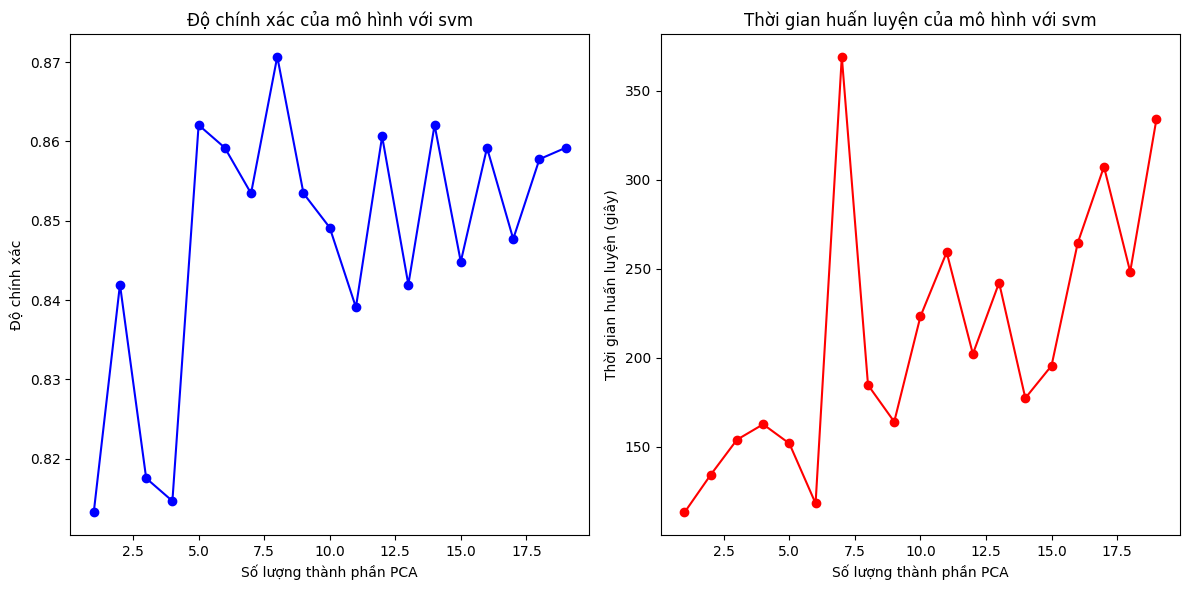

Lần lặp 1
Tỷ lệ dự đoán đúng cart: 0.7183908045977011, Thời gian huấn luyện: 0.0316 giây
Lần lặp 2
Tỷ lệ dự đoán đúng cart: 0.7543103448275862, Thời gian huấn luyện: 0.0248 giây
Lần lặp 3
Tỷ lệ dự đoán đúng cart: 0.742816091954023, Thời gian huấn luyện: 0.0293 giây
Lần lặp 4
Tỷ lệ dự đoán đúng cart: 0.7816091954022989, Thời gian huấn luyện: 0.0389 giây
Lần lặp 5
Tỷ lệ dự đoán đúng cart: 0.7658045977011494, Thời gian huấn luyện: 0.0434 giây
Lần lặp 6
Tỷ lệ dự đoán đúng cart: 0.7945402298850575, Thời gian huấn luyện: 0.0551 giây
Lần lặp 7
Tỷ lệ dự đoán đúng cart: 0.7658045977011494, Thời gian huấn luyện: 0.0561 giây
Lần lặp 8
Tỷ lệ dự đoán đúng cart: 0.7974137931034483, Thời gian huấn luyện: 0.0725 giây
Lần lặp 9
Tỷ lệ dự đoán đúng cart: 0.7772988505747126, Thời gian huấn luyện: 0.0711 giây
Lần lặp 10
Tỷ lệ dự đoán đúng cart: 0.7600574712643678, Thời gian huấn luyện: 0.0889 giây
Lần lặp 11
Tỷ lệ dự đoán đúng cart: 0.7701149425287356, Thời gian huấn luyện: 0.1056 giây
Lần lặp 12
Tỷ lệ dự 

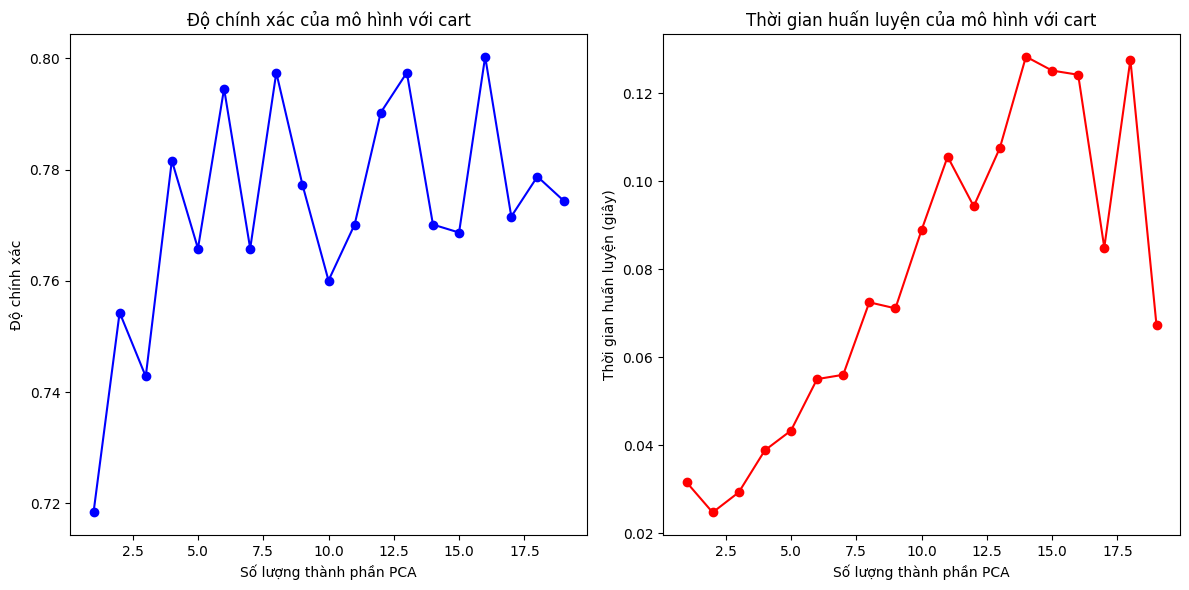

Lần lặp 1
Tỷ lệ dự đoán đúng id3: 0.7097701149425287, Thời gian huấn luyện: 0.0174 giây
Lần lặp 2
Tỷ lệ dự đoán đúng id3: 0.7227011494252874, Thời gian huấn luyện: 0.0215 giây
Lần lặp 3
Tỷ lệ dự đoán đúng id3: 0.7586206896551724, Thời gian huấn luyện: 0.0402 giây
Lần lặp 4
Tỷ lệ dự đoán đúng id3: 0.7758620689655172, Thời gian huấn luyện: 0.0305 giây
Lần lặp 5
Tỷ lệ dự đoán đúng id3: 0.7801724137931034, Thời gian huấn luyện: 0.0317 giây
Lần lặp 6
Tỷ lệ dự đoán đúng id3: 0.7873563218390804, Thời gian huấn luyện: 0.0780 giây
Lần lặp 7
Tỷ lệ dự đoán đúng id3: 0.7729885057471264, Thời gian huấn luyện: 0.0501 giây
Lần lặp 8
Tỷ lệ dự đoán đúng id3: 0.7830459770114943, Thời gian huấn luyện: 0.0796 giây
Lần lặp 9
Tỷ lệ dự đoán đúng id3: 0.7772988505747126, Thời gian huấn luyện: 0.0993 giây
Lần lặp 10
Tỷ lệ dự đoán đúng id3: 0.7701149425287356, Thời gian huấn luyện: 0.0676 giây
Lần lặp 11
Tỷ lệ dự đoán đúng id3: 0.7959770114942529, Thời gian huấn luyện: 0.1171 giây
Lần lặp 12
Tỷ lệ dự đoán đúng 

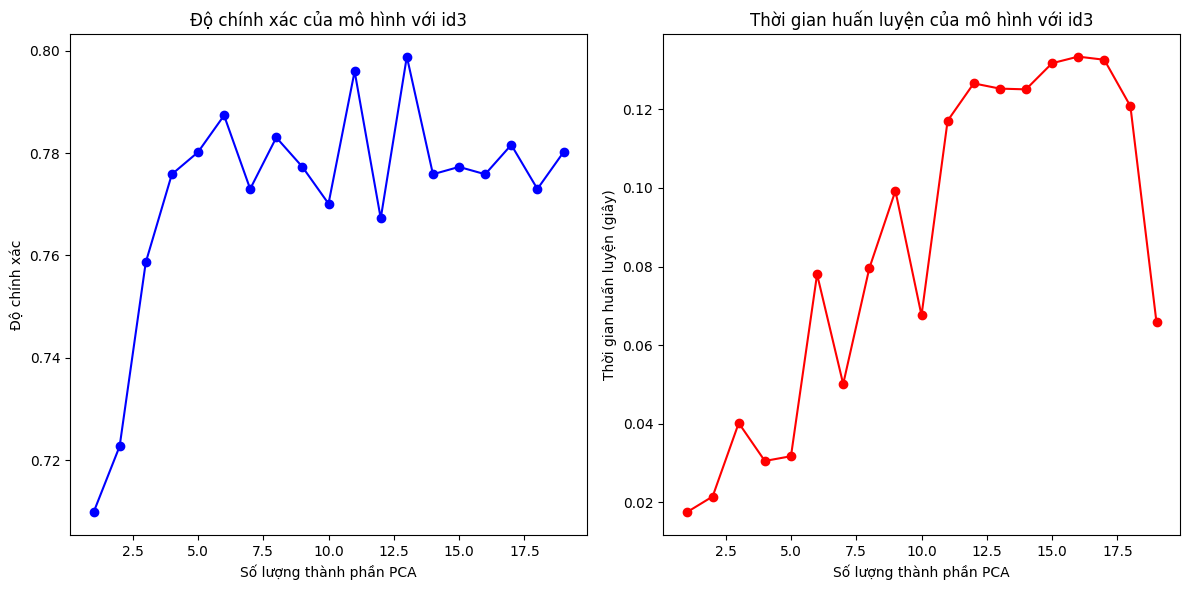

In [206]:
# Gọi hàm PCA_method để thực  hiện tim mô hình và cấu hình tốt nhất khi dùng PCA
svm_PCA,pca_best_svm,num_pca_svm = PCA_method( X, y,'svm')
cart_PCA,pca_best_cart,num_pca_cart = PCA_method( X, y,'cart')
id3_PCA,pca_best_id3,num_pca_id3 = PCA_method( X, y,'id3')

In [207]:
import joblib
# Lưu mô hình SVM sau khi huấn luyện
joblib.dump(svm_PCA, 'svm_model.pkl')
# Lưu mô hình CART sau khi huấn luyện
joblib.dump(cart_PCA, 'cart_model.pkl')
# Lưu mô hình ID3 sau khi huấn luyện
joblib.dump(id3_PCA, 'id3_model.pkl')
# Lưu PCA tốt nhất
joblib.dump(pca_best_svm, 'pca_best_svm.pkl')
joblib.dump(pca_best_cart, 'pca_best_cart.pkl')
joblib.dump(pca_best_id3, 'pca_best_id3.pkl')

['pca_best_id3.pkl']

In [209]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

# Tải các mô hình và PCA tốt nhất
svm_model = joblib.load('svm_model.pkl')
cart_model = joblib.load('cart_model.pkl')
id3_model = joblib.load('id3_model.pkl')
pca_best_svm = joblib.load('pca_best_svm.pkl')
pca_best_cart = joblib.load('pca_best_cart.pkl')
pca_best_id3 = joblib.load('pca_best_id3.pkl')

# Hàm dự đoán
def predict():
    try:
        # Lấy dữ liệu từ các trường nhập liệu, không bao gồm RainToday
        data = [
            float(entry_temp9am.get()), float(entry_temp3pm.get()), float(entry_mintemp.get()),
            float(entry_maxtemp.get()), float(entry_rainfall.get()), float(entry_evaporation.get()),
            float(entry_sunshine.get()), float(entry_windgustdir.get()), float(entry_winddir9am.get()),
            float(entry_winddir3pm.get()), float(entry_windgustspeed.get()), float(entry_windspeed9am.get()),
            float(entry_windspeed3pm.get()), float(entry_humidity9am.get()), float(entry_humidity3pm.get()),
            float(entry_pressure9am.get()), float(entry_pressure3pm.get()), float(entry_cloud9am.get()),
            float(entry_cloud3pm.get())
        ]
        data = np.array(data).reshape(1, -1)

        # Chọn mô hình và PCA tương ứng
        model_choice = model_var.get()
        if model_choice == 'SVM':
            pca = pca_best_svm
            model = svm_model
        elif model_choice == 'CART':
            pca = pca_best_cart
            model = cart_model
        elif model_choice == 'ID3':
            pca = pca_best_id3
            model = id3_model
        else:
            raise ValueError("Chọn mô hình không hợp lệ")

        # Dự đoán
        data_pca = pca.transform(data)
        prediction = model.predict(data_pca)[0]

        # Hiển thị kết quả
        messagebox.showinfo("Dự Đoán", f"Dự đoán của mô hình {model_choice} là: {'Có mưa' if prediction == 1 else 'Không mưa'}")

    except ValueError as e:
        messagebox.showerror("Lỗi", f"Đã xảy ra lỗi: {e}")
    except Exception as e:
        messagebox.showerror("Lỗi", f"Đã xảy ra lỗi không mong muốn: {e}")

# Tạo cửa sổ chính
root = tk.Tk()
root.title("Dự Đoán Thời Tiết")

# Tạo các trường nhập liệu với nhãn và các hướng dẫn
fields = [
    ("Nhiệt độ lúc 9 giờ sáng", "Temp9am"),
    ("Nhiệt độ lúc 3 giờ chiều", "Temp3pm"),
    ("Nhiệt độ tối thiểu", "MinTemp"),
    ("Nhiệt độ tối đa", "MaxTemp"),
    ("Lượng mưa", "Rainfall"),
    ("Bốc hơi", "Evaporation"),
    ("Ánh nắng", "Sunshine"),
    ("Hướng gió mạnh nhất", "WindGustDir"),
    ("Hướng gió lúc 9 giờ sáng", "WindDir9am"),
    ("Hướng gió lúc 3 giờ chiều", "WindDir3pm"),
    ("Tốc độ gió mạnh nhất", "WindGustSpeed"),
    ("Tốc độ gió lúc 9 giờ sáng", "WindSpeed9am"),
    ("Tốc độ gió lúc 3 giờ chiều", "WindSpeed3pm"),
    ("Độ ẩm lúc 9 giờ sáng", "Humidity9am"),
    ("Độ ẩm lúc 3 giờ chiều", "Humidity3pm"),
    ("Áp suất lúc 9 giờ sáng", "Pressure9am"),
    ("Áp suất lúc 3 giờ chiều", "Pressure3pm"),
    ("Mây lúc 9 giờ sáng", "Cloud9am"),
    ("Mây lúc 3 giờ chiều", "Cloud3pm")
]

entries = {}
for i, (label_text, var_name) in enumerate(fields):
    tk.Label(root, text=label_text + ":").grid(row=i, column=0, sticky='e')
    entry = tk.Entry(root)
    entry.grid(row=i, column=1)
    entries[var_name] = entry

# Gán biến cho các trường nhập liệu
entry_temp9am = entries["Temp9am"]
entry_temp3pm = entries["Temp3pm"]
entry_mintemp = entries["MinTemp"]
entry_maxtemp = entries["MaxTemp"]
entry_rainfall = entries["Rainfall"]
entry_evaporation = entries["Evaporation"]
entry_sunshine = entries["Sunshine"]
entry_windgustdir = entries["WindGustDir"]
entry_winddir9am = entries["WindDir9am"]
entry_winddir3pm = entries["WindDir3pm"]
entry_windgustspeed = entries["WindGustSpeed"]
entry_windspeed9am = entries["WindSpeed9am"]
entry_windspeed3pm = entries["WindSpeed3pm"]
entry_humidity9am = entries["Humidity9am"]
entry_humidity3pm = entries["Humidity3pm"]
entry_pressure9am = entries["Pressure9am"]
entry_pressure3pm = entries["Pressure3pm"]
entry_cloud9am = entries["Cloud9am"]
entry_cloud3pm = entries["Cloud3pm"]

# Tạo radio buttons cho lựa chọn mô hình
model_var = tk.StringVar(value='SVM')
tk.Radiobutton(root, text='SVM', variable=model_var, value='SVM').grid(row=len(fields), column=0)
tk.Radiobutton(root, text='CART', variable=model_var, value='CART').grid(row=len(fields), column=1)
tk.Radiobutton(root, text='ID3', variable=model_var, value='ID3').grid(row=len(fields), column=2)

# Tạo nút dự đoán
predict_button = tk.Button(root, text="Dự Đoán", command=predict)
predict_button.grid(row=len(fields) + 1, column=0, columnspan=3)

# Chạy ứng dụng
root.mainloop()


TclError: no display name and no $DISPLAY environment variable

In [ ]:
X_test_PCA_id3 = pca_best_id3.transform(X_test)
y_predict_id3 = id3_PCA.predict(X_test_PCA_id3) 
X_test_PCA_id3 = pca_best_id3.transform(X_test)
y_predict_id3 = id3_PCA.predict(X_test_PCA_id3)
